In [3]:
library('rjags')

Loading required package: coda
Linked to JAGS 4.3.0
Loaded modules: basemod,bugs


In [1]:
lg = function(mu, n, ybar) {
  mu2 = mu^2
  n * (ybar * mu - mu2 / 2.0) - log(1 + mu2)
}

In [2]:
mh = function(n, ybar, n_iter, mu_init, cand_sd) {
  ## Random-Walk Metropolis-Hastings algorithm
  
  ## step 1, initialize
  mu_out = numeric(n_iter)
  accpt = 0
  mu_now = mu_init
  lg_now = lg(mu=mu_now, n=n, ybar=ybar)
  
  ## step 2, iterate
  for (i in 1:n_iter) {
    ## step 2a
    mu_cand = rnorm(n=1, mean=mu_now, sd=cand_sd) # draw a candidate
    
    ## step 2b
    lg_cand = lg(mu=mu_cand, n=n, ybar=ybar) # evaluate log of g with the candidate
    lalpha = lg_cand - lg_now # log of acceptance ratio
    alpha = exp(lalpha)
    
    ## step 2c
    u = runif(1) # draw a uniform variable which will be less than alpha with probability min(1, alpha)
    if (u < alpha) { # then accept the candidate
      mu_now = mu_cand
      accpt = accpt + 1 # to keep track of acceptance
      lg_now = lg_cand
    }
    
    ## collect results
    mu_out[i] = mu_now # save this iteration's value of mu
  }
  
  ## return a list of output
  list(mu=mu_out, accpt=accpt/n_iter)
}

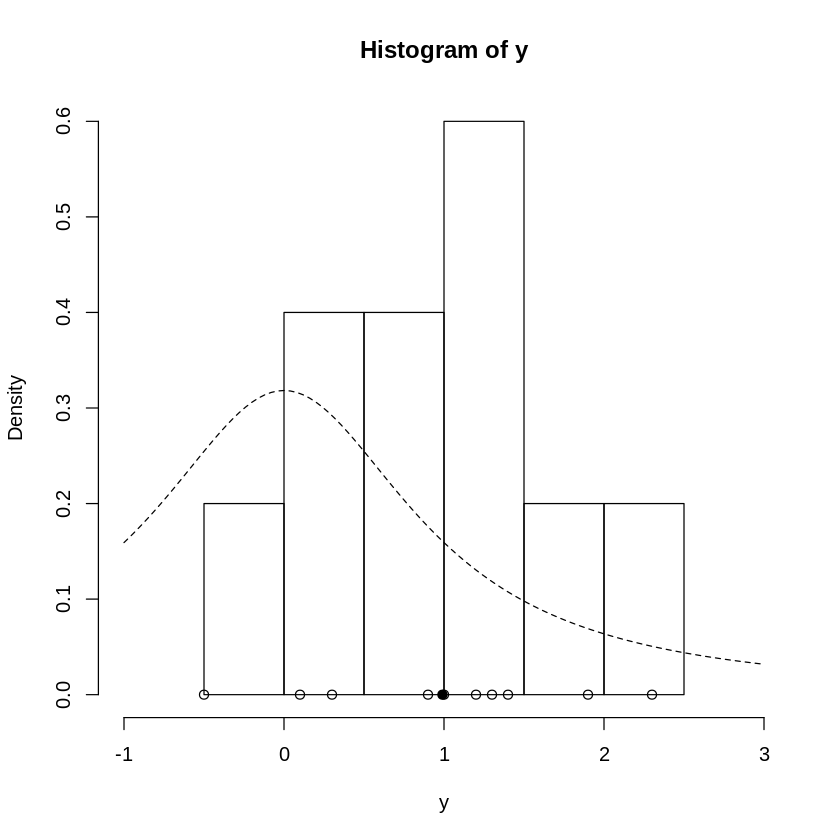

In [3]:
y = c(1.2, 1.4, -0.5, 0.3, 0.9, 2.3, 1.0, 0.1, 1.3, 1.9)
ybar = mean(y)
n = length(y)
hist(y, freq=FALSE, xlim=c(-1.0, 3.0)) # histogram of the data
curve(dt(x=x, df=1), lty=2, add=TRUE) # prior for mu
points(y, rep(0,n), pch=1) # individual data points
points(ybar, 0, pch=19) # sample mean

In [4]:
set.seed(43) # set the random seed for reproducibility
post = mh(n=n, ybar=ybar, n_iter=1e3, mu_init=0.0, cand_sd=3.0)
str(post)

List of 2
 $ mu   : num [1:1000] -0.113 1.507 1.507 1.507 1.507 ...
 $ accpt: num 0.122


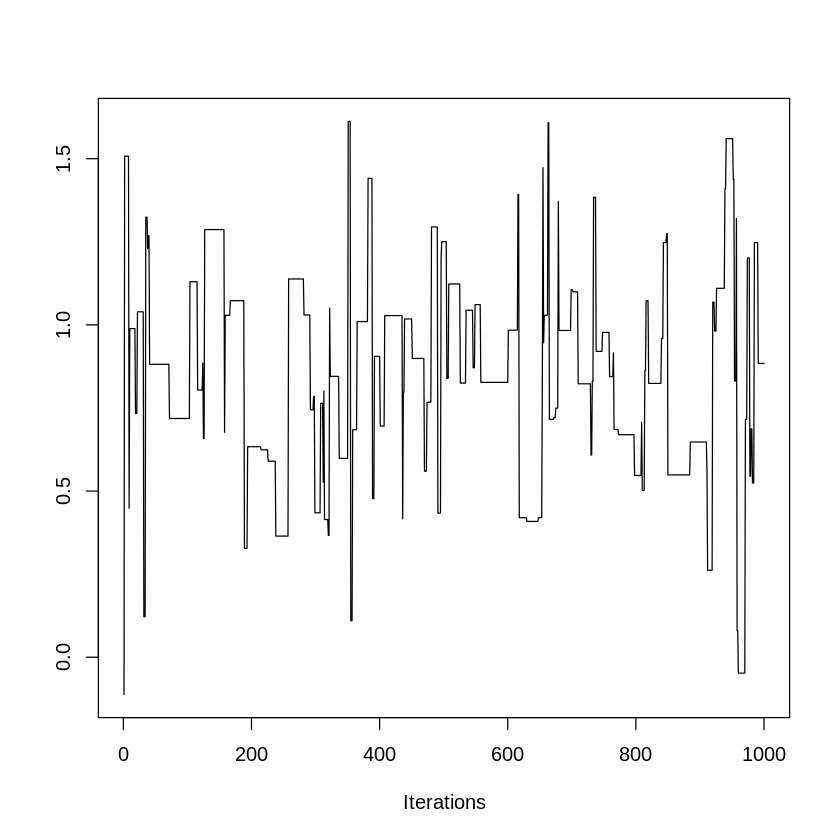

In [5]:
library("coda")
traceplot(as.mcmc(post$mu))

In [6]:
post = mh(n=n, ybar=ybar, n_iter=1e3, mu_init=0.0, cand_sd=0.9)
post$accpt

[1] 0.378

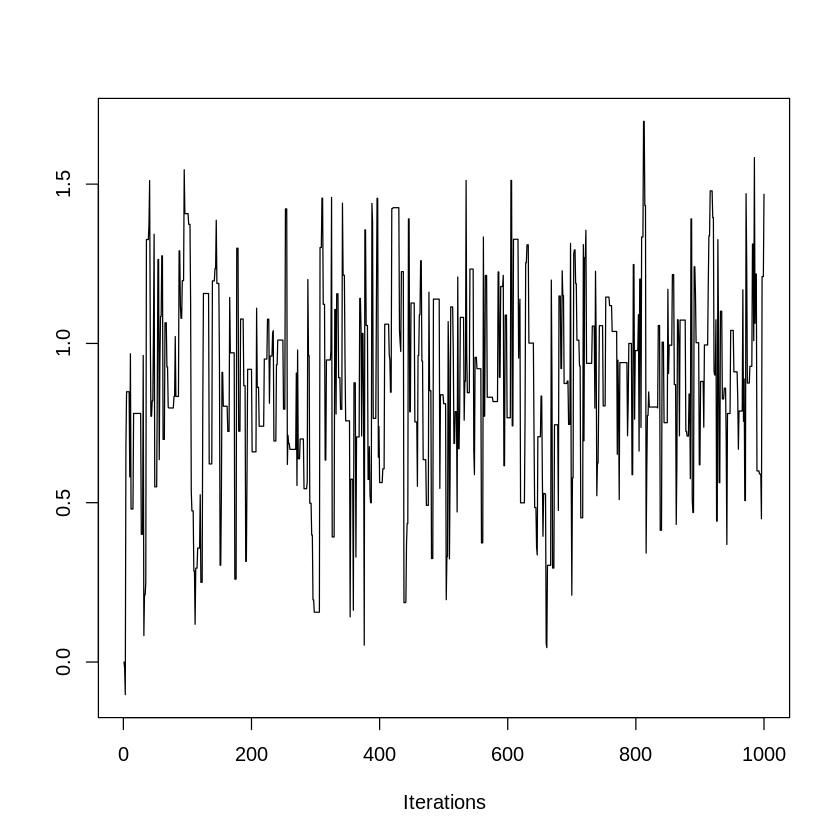

In [7]:
traceplot(as.mcmc(post$mu))

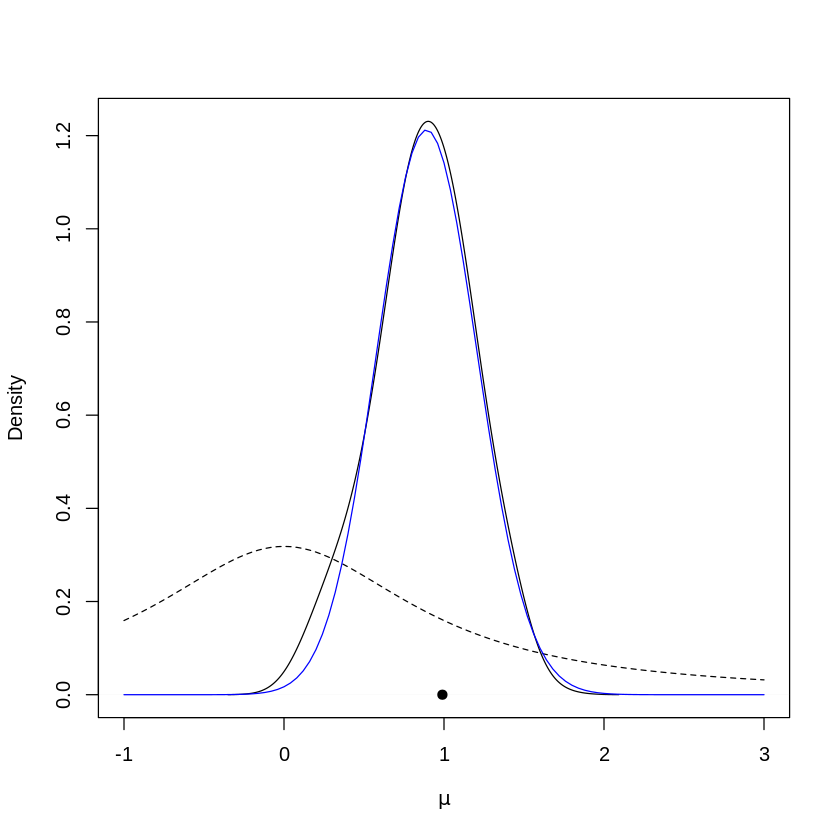

In [8]:
post$mu_keep = post$mu[-c(1:100)] # discard the first 200 samples
plot(density(post$mu_keep, adjust=2.0), main="", xlim=c(-1.0, 3.0), xlab=expression(mu)) # plot density estimate of the posterior
curve(dt(x=x, df=1), lty=2, add=TRUE) # prior for mu
points(ybar, 0, pch=19) # sample mean

curve(0.017*exp(lg(mu=x, n=n, ybar=ybar)), from=-1.0, to=3.0, add=TRUE, col="blue") # approximation to the true posterior in blue

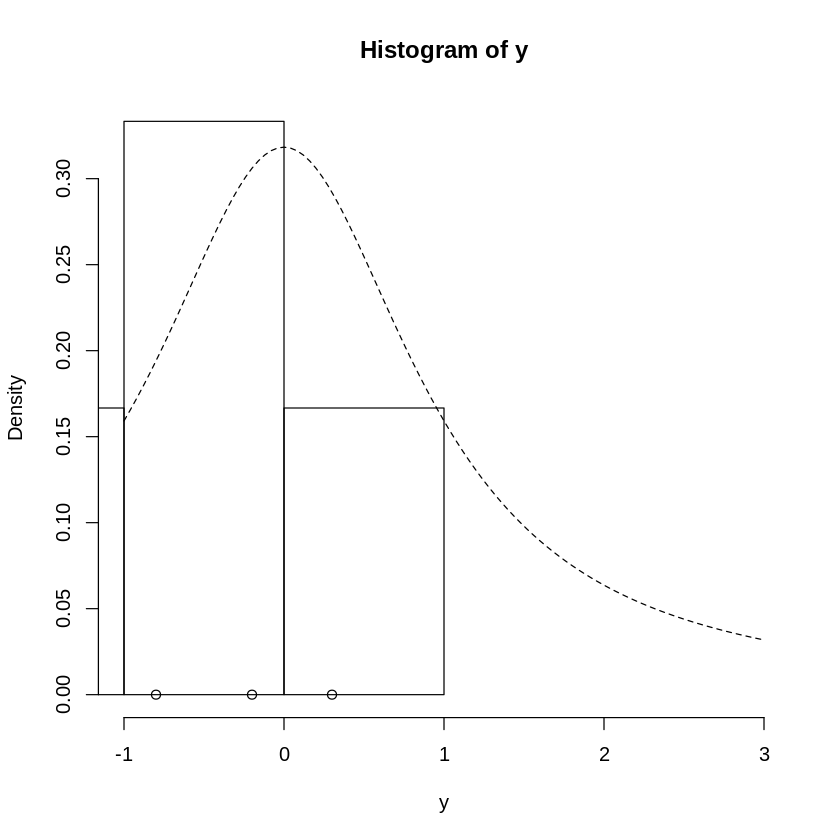

In [9]:
y = c(-0.2, -1.5, -5.3, 0.3, -0.8, -2.2)
ybar = mean(y)
n = length(y)
hist(y, freq=FALSE, xlim=c(-1.0, 3.0)) # histogram of the data
curve(dt(x=x, df=1), lty=2, add=TRUE) # prior for mu
points(y, rep(0,n), pch=1) # individual data points
points(ybar, 0, pch=19) # sample mean

In [15]:
post = mh(n=n, ybar=ybar, n_iter=1e3, mu_init=0.0, cand_sd=1.5)
post$accpt

[1] 0.318

In [18]:
summary(as.mcmc(post$mu))


Iterations = 1:1000
Thinning interval = 1 
Number of chains = 1 
Sample size per chain = 1000 

1. Empirical mean and standard deviation for each variable,
   plus standard error of the mean:

          Mean             SD       Naive SE Time-series SE 
      -1.44305        0.41414        0.01310        0.02775 

2. Quantiles for each variable:

  2.5%    25%    50%    75%  97.5% 
-2.160 -1.712 -1.495 -1.177 -0.617 
